# Downloading the data

In [13]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

#because of the licensing issues we cannot share the data extracted from the pdf's neither the pdf's
#please use the csv file of all arxiv links pointing to the application
file_id = ''
destination = './for_transformers.csv'
download_file_from_google_drive(file_id, destination)

Setting the TPU (For Faster executions)

In [14]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.5.0
Running on TPU  ['10.120.15.82:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.120.15.82:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.120.15.82:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [15]:
import pandas as pd
reviews=pd.read_csv("/content/for_transformers.csv")
print(reviews.columns)
new=reviews[["texts","labels"]]
print(new.shape)
new.head()

Index(['Unnamed: 0', 'texts', 'coordinates', 'labels', 'page_no'], dtype='object')
(1064955, 2)


,texts,labels
0,"(3) For all vertices wvk S where |S| is odd,",Basic
1,existing logspace algorithms for LHOM(H) is qu...,Basic
2,"function unpopularity factor on MG, when it is...",Basic
3,connectivity k into components each containing...,Basic
4,7.5 together with Proposition 6.8 will lead to...,Basic


In [16]:
#train test split and random splitting
from sklearn.model_selection import train_test_split
# create training and testing data (80% train and 20% test)
data_train, data_test = train_test_split(new,test_size=0.2,random_state=42,stratify=new["labels"])#test size here relates to second var i.e test

print("="*20+" train data (80%)"+"="*20)
print (data_train.shape)
print("="*20+" test data (20%)"+"="*20)
print (data_test.shape)

==================== train data (80%)====================
(851964, 2)
==================== test data (20%)====================
(212991, 2)


In [17]:
x_train=data_train["texts"]
x_test=data_test["texts"]
y_train=data_train["labels"]
y_test=data_test["labels"]

In [18]:
print(x_train.shape)
print(y_train.shape)

(851964,)
(851964,)


In [19]:
print(x_train[0],y_train[0])

(3) For all vertices wvk S where |S| is odd, Basic


In [20]:
#### label encoding my y of train and test data 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)

print("The classes obtained")
print(le.classes_)

y_train=le.transform(y_train)
y_test=le.transform(y_test)

print(type(x_train))
print(x_train[1])


The classes obtained
['Basic' 'Proof' 'Theorem']
<class 'pandas.core.series.Series'>
existing logspace algorithms for LHOM(H) is quite complicated (see [4]), and the second algorithm


In [21]:
print(x_train[0],y_train[0])

(3) For all vertices wvk S where |S| is odd, 2


In [22]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

X_train=x_train.to_list()
X_test=x_test.to_list()

print(type(x_train),type(x_test))

(851964,) (212991,)
(851964,) (212991,)
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

top_words = 50000
max_review_length = 50
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
list_tokenized_train = tokenizer.texts_to_sequences(X_train)

#for bert max length is 512 
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)

In [24]:
tokenizer.fit_on_texts(X_test)
list_tokenized_train = tokenizer.texts_to_sequences(X_test)

#for bert max length is 512 
X_test = pad_sequences(list_tokenized_train, maxlen=max_review_length)

In [25]:
import pandas as pd
Y_train=pd.get_dummies(y_train)
Y_test=pd.get_dummies(y_test)

# saving the tokenizer for later use

In [30]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define the architecture of LSTM model

*   Embedding layer used of dimension 32
*   100 LSTM cells with dropout of 0.2
*   the final layer has 3 categories for each label

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import  Dense, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# This is fixed.


EMBEDDING_DIM = 32 ####hyper parameter

with tpu_strategy.scope():
  model = Sequential()

  model.add(Embedding(top_words, EMBEDDING_DIM, input_length=X_train.shape[1]))

  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2)) #for cudadnn set rec dropout as 0
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            1600000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 1,653,503
Trainable params: 1,653,503
Non-trainable params: 0
_________________________________________________________________


In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(851964, 50)
(851964, 3)
(212991, 50)
(212991, 3)


In [33]:
#without classs weights
with tpu_strategy.scope():
  epochs = 30 #hyper parameter
  batch_size = 512 #number of training samples to push through
  history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                      validation_data=(X_test,Y_test),
                      callbacks=[EarlyStopping(monitor='val_loss',mode="min",  patience=3, min_delta=0.0001)]
                      )

Epoch 1/30
1664/1664 [==============================] - 48s 25ms/step - loss: 0.9254 - accuracy: 0.5649 - val_loss: 1.0292 - val_accuracy: 0.4759
Epoch 2/30
1664/1664 [==============================] - 39s 24ms/step - loss: 0.8712 - accuracy: 0.6020 - val_loss: 1.0517 - val_accuracy: 0.4704
Epoch 3/30
1664/1664 [==============================] - 39s 24ms/step - loss: 0.8479 - accuracy: 0.6138 - val_loss: 1.0751 - val_accuracy: 0.4668
Epoch 4/30
1664/1664 [==============================] - 40s 24ms/step - loss: 0.8299 - accuracy: 0.6223 - val_loss: 1.1105 - val_accuracy: 0.4651


In [34]:
with tpu_strategy.scope():
    accr = model.evaluate(X_test,Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1])) 

6656/6656 [==============================] - 81s 12ms/step - loss: 1.1105 - accuracy: 0.4651
Test set
  Loss: 1.110
  Accuracy: 0.465


# Plots (Epoch Vs Training/Test _ Accuracy/Loss)

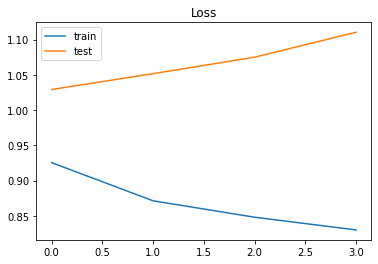

In [35]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


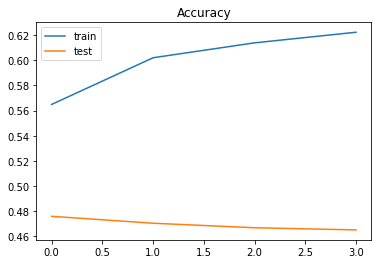

In [36]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [37]:
with tpu_strategy.scope():
    prediction = model.predict(X_test)

In [38]:
prediction.shape

(212991, 3)

In [39]:
import numpy as np
y_pred=np.argmax(prediction,axis=1)
y_pred.shape

(212991,)

In [40]:
y_test=data_test["labels"]
y_test=le.transform(y_test)
Y_test=y_test

In [41]:
print(Y_test.shape)
print(y_pred.shape)


(212991,)
(212991,)


# Confusion Matrix


this is my models accuracy :0.465094769262551

this is my models f1 :0.46459158580217413
LSTM confusion matrix:

tn:34670
fp:19729
fn:22472
tp:29125



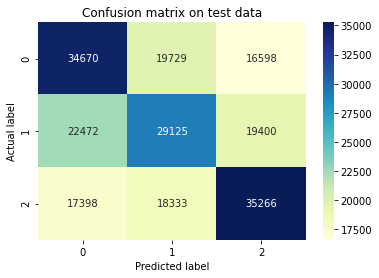

The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them 
my f1 score on test:  0.46459158580217413
my accuracy score on test:  0.465094769262551


In [42]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
acc=accuracy_score(Y_test, y_pred)
_f1=f1_score(Y_test,y_pred,average= "weighted")

print("\nthis is my models accuracy :{}".format(acc))
print("\nthis is my models f1 :{}".format(_f1))

#plotting the confusion matrix from the data
import pandas as pd
confusion_matrix= metrics.confusion_matrix(Y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("LSTM confusion matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(Y_test,y_pred,average= "weighted"))
print("my accuracy score on test: ",accuracy_score(Y_test,y_pred))
print("="*20)


# save and load the LSTM model

In [43]:
#save model
model.save('lstm_short.h5')

In [44]:
new_model = tf.keras.models.load_model('lstm_short.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            1600000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 1,653,503
Trainable params: 1,653,503
Non-trainable params: 0
_________________________________________________________________


In [45]:
!pip3 install pickle5

     |████████████████████████████████| 133kB 5.4MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219261 sha256=d77b03ad3d6a31a40de52d3d2bc167d16ae4e0524e15aadf7b80e5e5fa16b95a
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
# loading
import pickle5 as pickle

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Testing the model input with a sample input (directly copied from pdf) randomly picked from some papers

Testing purposes (Paper) -

Source- https://arxiv.org/pdf/1902.11202.pdf

Unifying computational entropies via Kullback–Leibler divergence

**(see page 12)**

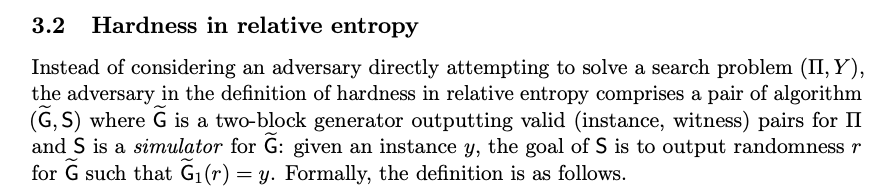

In [48]:
#try something
def texts_to_labels(new_inp):
  from keras.preprocessing.sequence import pad_sequences


  seq = tokenizer.texts_to_sequences(new_inp)
  padded = pad_sequences(seq, maxlen=100)


  pred = model.predict(padded)
  pred=np.argmax(pred, axis=1)
  labels = ["Basic","Proofs","Theorem"]
  def num_to_labels(pred):
      new=[]
      for element in pred:
          new.append(labels[element])
      return new

  return num_to_labels(pred)

texts = ["3.2 Hardness in relative entropy",
      "Instead of considering an adversary directly attempting to solve a search problem (Π, Y ),",
      "the adversary in the definition of hardness in relative entropy comprises a pair of algorithm",
      "(G􏰒,S) where G􏰒 is a two-block generator outputting valid (instance, witness) pairs for Π",
      "and S is a simulator for G􏰒: given an instance y, the goal of S is to output randomness r",
      "for G􏰒 such that G􏰒1(r) = y. Formally, the definition is as follows."]

texts_to_labels(texts)

['Theorems', 'Basic', 'Basic', 'Proofs', 'Theorems', 'Theorems']

 Let's try to check for a theorem section

**(see page 12)**

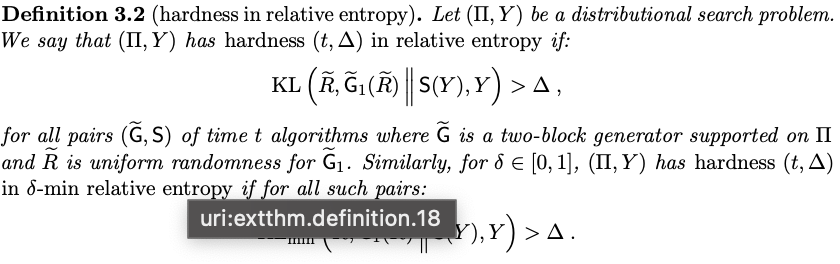

In [49]:
texts= ["Definition 3.2 (hardness in relative entropy). Let (Π, Y ) be a distributional search problem.",
      "We say that (Π, Y ) has hardness (t, ∆) in relative entropy if: 􏰆􏰅􏰇",
      "KL R􏰒, G􏰒1(R􏰒) 􏰅􏰅 S(Y ), Y > ∆ ,",
      "for all pairs (G􏰒,S) of time t algorithms where G􏰒 is a two-block generator supported on Π",
      "and R􏰒 is uniform randomness for G􏰒1. Similarly, for δ ∈ [0, 1], (Π, Y ) has hardness (t, ∆)",
      "in δ-min relative entropy if for all such pairs: δ􏰆􏰅􏰇",
      "KLmin R􏰒, G􏰒1(R􏰒) 􏰅􏰅 S(Y ), Y > ∆ ."] #a list of all text to see

texts_to_labels(texts)

['Theorems', 'Theorems', 'Theorems', 'Basic', 'Proofs', 'Theorems', 'Theorems']

**(see page 13)** all Proofs

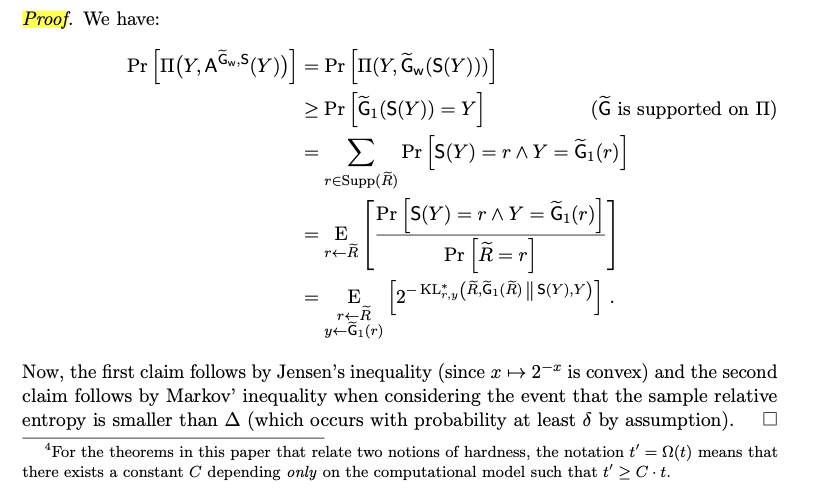

In [50]:
texts=["Proof. We have:",
      "Pr 􏰓Π􏰁Y, AG􏰒w,S(Y )􏰂􏰔 = Pr 􏰓Π(Y, G􏰒w(S(Y )))􏰔",
      "≥ Pr 􏰓G􏰒1(S(Y )) = Y 􏰔 (G􏰒 is supported on Π)",
      "= 􏰐 Pr􏰓S(Y)=r∧Y =G􏰒1(r)􏰔 r∈Supp(R􏰒)",
      "Pr􏰓S(Y)=r∧Y =G􏰒1(r)􏰔 =E􏰓􏰔",
      "r←R􏰒 Pr R􏰒=r",
      "= E 􏰓2−KL∗r,y(R􏰒,G􏰒1(R􏰒)∥S(Y),Y)􏰔 .",
      "r←R􏰒",
      "y ← G􏰒 1 ( r )",
      "Now, the first claim follows by Jensen’s inequality (since x 􏰀→ 2−x is convex) and the second",
      "claim follows by Markov’ inequality when considering the event that the sample relative",
      "entropy is smaller than ∆ (which occurs with probability at least δ by assumption).",
      "4For the theorems in this paper that relate two notions of hardness, the notation t′ = Ω(t) means that",
      "there exists a constant C depending only on the computational model such that t′ ≥ C · t."]

texts_to_labels(texts)

['Theorems',
 'Proofs',
 'Theorems',
 'Proofs',
 'Proofs',
 'Proofs',
 'Proofs',
 'Basic',
 'Proofs',
 'Proofs',
 'Proofs',
 'Proofs',
 'Proofs',
 'Proofs']

In [51]:
!pip install eli5

     |████████████████████████████████| 112kB 4.9MB/s 
